<a href="https://colab.research.google.com/github/AndresAcostaEgea/Data_Science_Python_ML_AI/blob/main/andres_acosta_egea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
import tensorflow
import keras

sns.set_style("darkgrid")

In [6]:
passengers = pd.read_csv("../content/train.csv")
passengers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
passengers.pivot_table(values="Pclass", aggfunc="sum", index="Sex", columns=None)

,Pclass
Sex,
female,678
male,1379


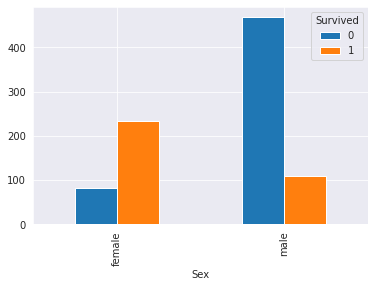

In [9]:
pd.crosstab(passengers['Sex'], passengers['Survived']).plot.bar()

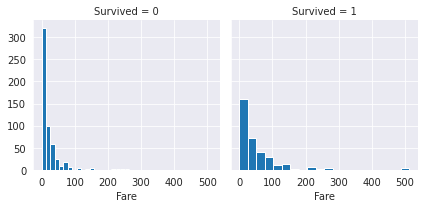

In [10]:
findoutliers = sns.FacetGrid(passengers, col="Survived")
findoutliers.map(plt.hist, "Fare", bins=20)

In [12]:
passengers.loc[passengers["Fare"] >= 400, "Fare"]= passengers["Fare"].median()

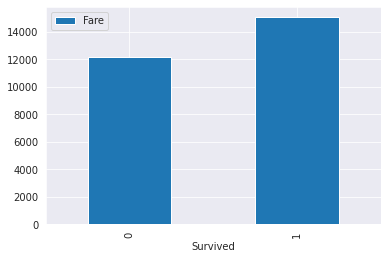

In [13]:
passengers.pivot_table(values="Fare", aggfunc="sum", index="Survived", columns=None).plot.bar()

In [14]:
passengers.loc[passengers["Age"] >= 70, "Age"]= 70

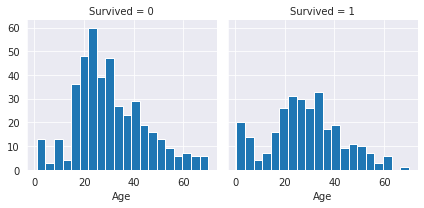

In [15]:
findoutliers2 = sns.FacetGrid(passengers, col="Survived")
findoutliers2.map(plt.hist, "Age", bins=20)

In [16]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
passengers.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
passengers["Age"].fillna(passengers['Age'].median(), inplace=True)

In [19]:
passengers["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
passengers["Embarked"].fillna("S", inplace=True)

In [21]:
del passengers["Cabin"]

In [22]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
passengers['Name'].sample(10)

276                    Lindblom, Miss. Augusta Charlotta
16                                  Rice, Master. Eugene
583                                  Ross, Mr. John Hugo
117                      Turpin, Mr. William John Robert
565                                 Davies, Mr. Alfred J
755                            Hamalainen, Master. Viljo
423    Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...
27                        Fortune, Mr. Charles Alexander
800                                 Ponesell, Mr. Martin
354                                    Yousif, Mr. Wazli
Name: Name, dtype: object

In [24]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return "No title in name"

In [25]:
def shorter_title(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Major']:
        return 'Officer'
    elif title in ['Jonhkeer', 'Don', 'the Countess', 'Dona', 'Lady', 'Sir']:
        return 'Royalty'
    elif title == 'Mme':
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else:
        return title

In [26]:
passengers['Title'] = passengers['Name'].map(lambda x: get_title(x))

In [27]:
passengers['Title'] = passengers.apply(shorter_title, axis=1)

In [28]:
passengers['Title'].value_counts()

Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Officer       5
Royalty       4
Jonkheer      1
Name: Title, dtype: int64

In [29]:
passengers['Sex'].replace(('male', 'female'), (0,1), inplace=True)

In [30]:
passengers['Embarked'].replace(('S', 'C', 'Q'), (0,1,2), inplace=True)

In [40]:
passengers['Title'].replace(('Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Officer', 'Royalty', 'Jonkheer'), (0,1,2,3,4,5,6,7,8), inplace=True)

In [41]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


In [43]:
passengers.drop(columns=['Name', 'Ticket'], inplace=True)

In [44]:
passengers.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033365,-0.057527,-0.001652,-0.002623,-0.030467,0.017990
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.065880,-0.035322,0.081629,0.259289,0.106811,0.358602
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.340248,0.083081,0.018443,-0.600223,0.045702,-0.193367
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.080503,0.114631,0.245489,0.221991,0.116569,0.429830
Age,0.033365,-0.065880,-0.340248,-0.080503,1.000000,-0.233755,-0.172645,0.098790,-0.008806,-0.038987
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233755,1.000000,0.414838,0.212307,-0.059961,0.229487
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172645,0.414838,1.000000,0.263767,-0.078665,0.265709
Fare,-0.002623,0.259289,-0.600223,0.221991,0.098790,0.212307,0.263767,1.000000,0.034099,0.161407
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.008806,-0.059961,-0.078665,0.034099,1.000000,0.041929
Title,0.017990,0.358602,-0.193367,0.429830,-0.038987,0.229487,0.265709,0.161407,0.041929,1.000000


In [45]:
correlations = passengers.corr()
correlations['Survived'].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Title          0.358602
Fare           0.259289
Embarked       0.106811
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.065880
Pclass        -0.338481
Name: Survived, dtype: float64

In [46]:
y = passengers['Survived']
x = passengers.drop(['Survived', 'PassengerId'], axis=1)

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.1)

In [47]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(f"Accuracy of prediction: {acc_randomforest}")

pickle.dump(randomforest, open('titanic_model.sav', 'wb'))

Accuracy of prediction: 74.44


Loading the Test Data

In [48]:
passengers_data = pd.read_csv("../content/test.csv")
passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [49]:
passengers_data['Title'] = passengers_data['Name'].map(lambda x: get_title(x))

passengers_data['Title'] = passengers_data.apply(shorter_title, axis=1)
ids = passengers_data['PassengerId']

passengers_data["Age"].fillna(passengers_data['Age'].median(), inplace=True)
passengers_data["Fare"].fillna(passengers_data['Fare'].median(), inplace=True)
passengers_data["Embarked"].fillna("S", inplace=True)

passengers_data.drop('Cabin', axis=1, inplace=True)
passengers_data.drop('Name', axis=1, inplace=True)
passengers_data.drop('Ticket', axis=1, inplace=True)
passengers_data.drop('PassengerId', axis=1, inplace=True)
passengers_data['Sex'].replace(('male', 'female'), (0,1), inplace=True)
passengers_data['Embarked'].replace(('S', 'C', 'Q'), (0,1,2), inplace=True)
passengers_data['Title'].replace(('Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Officer', 'Royalty', 'Jonkheer'), (0,1,2,3,4,5,6,7,8), inplace=True)

In [50]:
passengers_data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.599282,0.447368,0.392344,35.576535,0.464115,0.763158
std,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.685516,1.094517
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,1.000000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000,7.000000


In [51]:
passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Title     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [52]:
predictions = randomforest.predict(passengers_data)
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [53]:
output.to_csv('passenger_predictions_gc.csv', index=False)